<a href="https://colab.research.google.com/github/T-art-coder/Sole-Projects/blob/main/Guardian%20News%202016-2018.%20LDA%2C%20Topic%20Modeling/Guardian_News_Topic_Modeling_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Guardian News Dataset


In [ ]:
install.packages("tidytext")
install.packages("tm")
devtools::install_github('Mikata-Project/ggthemr')
install.packages("showtext")
library(showtext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’




In [ ]:
system2('sudo', 'apt-get install libgsl0-dev')
install.packages("topicmodels", repos='http://cran.us.r-project.org')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘modeltools’




In [ ]:
library(tidyverse)
library(lubridate)
library(stringr)

In [ ]:
library(tm)
library(tidytext)
library(topicmodels)
library(ggthemr)

In [ ]:
guardian_r <- read.csv("/content/guardian_articles.csv")

head(guardian_r, 1)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


article_id                                                          
1 us-news/2016/jan/31/iowa-caucus-underdog-candidates-omalley-huckabee
  sectionName
1 US news    
  webTitle                                                            
1 Iowa underdogs put on brave faces despite all but inevitable defeats
  webUrl                                                                                          
1 https://www.theguardian.com/us-news/2016/jan/31/iowa-caucus-underdog-candidates-omalley-huckabee
  bodyContent                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
guardian_r <- guardian_r %>% 
  separate(webPublicationDate, c("Date", "Time"), sep = "T" ) %>% 
  mutate(Time = str_replace_all(Time, "Z", ""), 
       Date = as.Date(Date, "%Y-%m-%d")) 

head(guardian_r)

In [ ]:
ggthemr('fresh')
# ggthemr_reset()

In [ ]:
## Loading Google fonts (https://fonts.google.com/)
font_add_google("Gochi Hand", "gochi")
font_add_google("Schoolbell", "bell")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



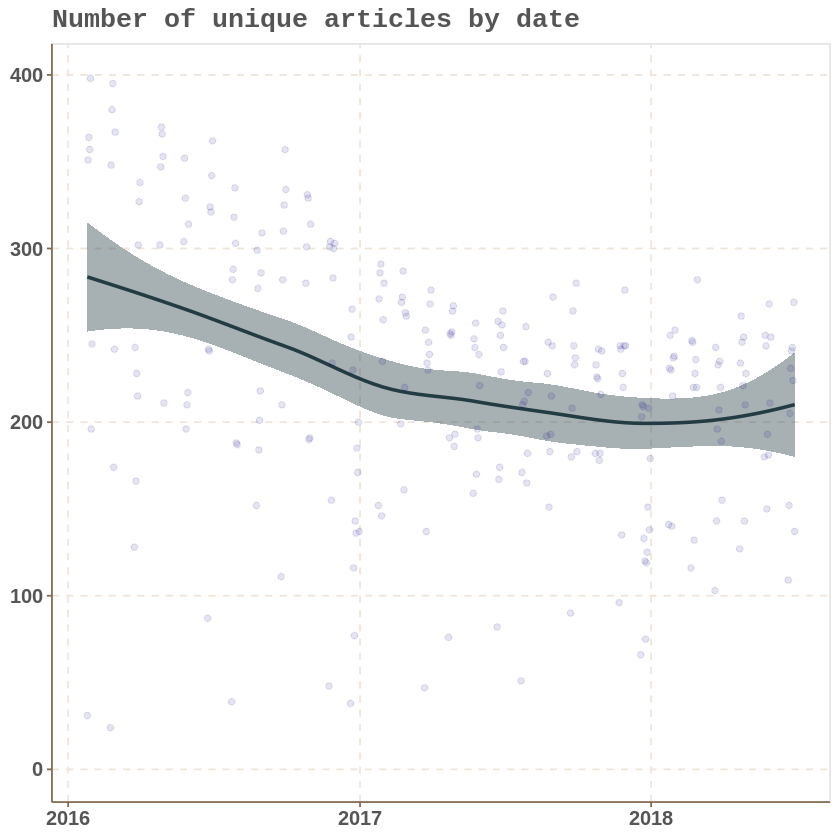

In [ ]:
guardian_r %>% select(Date, id) %>% 
  group_by(Date) %>%
  summarize(n = n()) %>%
  ggplot(aes(x = Date, y = n)) +
  geom_smooth()+
  geom_point(alpha = 0.1, color = "navyblue")+
  theme(plot.title = element_text(size = 16, family  = "bell", face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold", size = 12),
    axis.text.y = element_text(face = "bold", size = 12),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    panel.border = element_rect(color = "grey90", fill = NA)
        )+
  labs(title = "Number of unique articles by date")

Convert to document term matrix

In [ ]:
guardian_r %>% select(-bodyContent)

article_id,sectionName,webTitle,webUrl,Date,Time,id
<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<int>
us-news/2016/jan/31/iowa-caucus-underdog-candidates-omalley-huckabee,US news,Iowa underdogs put on brave faces despite all but inevitable defeats,https://www.theguardian.com/us-news/2016/jan/31/iowa-caucus-underdog-candidates-omalley-huckabee,2016-01-31,23:53:37,1
us-news/2016/jan/31/iowa-caucus-worlds-most-patriotic-tractor-mike-huckabee,US news,Iowa caucus: hologram eagle and Jesus star on America's most patriotic tractor,https://www.theguardian.com/us-news/2016/jan/31/iowa-caucus-worlds-most-patriotic-tractor-mike-huckabee,2016-01-31,23:46:28,2
world/2016/jan/31/tanzania-britsh-helicopter-pilot-roger-gower-shot-down-three-men-arrested,World news,British pilot in Tanzania 'manoeuvred ​to save colleague​​ before death',https://www.theguardian.com/world/2016/jan/31/tanzania-britsh-helicopter-pilot-roger-gower-shot-down-three-men-arrested,2016-01-31,23:43:48,3
football/2016/jan/31/late-winner-gets-usa-off-to-winning-start-in-2016-against-iceland,Football,USA 3-2 Iceland | International friendly match report,https://www.theguardian.com/football/2016/jan/31/late-winner-gets-usa-off-to-winning-start-in-2016-against-iceland,2016-01-31,23:30:49,4
football/2016/jan/31/blackburn-paul-lambert-oxford-fa-cup,Football,Reinvigorated Paul Lambert reflects after improved Blackburn display,https://www.theguardian.com/football/2016/jan/31/blackburn-paul-lambert-oxford-fa-cup,2016-01-31,22:30:10,5
football/blog/2016/jan/31/leyton-orient-cambridge-kevin-nolan,Football,Leyton Orient’s Kevin Nolan admits to hurt after Cambridge defeat | Jeremy Alexander,https://www.theguardian.com/football/blog/2016/jan/31/leyton-orient-cambridge-kevin-nolan,2016-01-31,22:30:10,6
football/2016/jan/31/jurgen-klopp-liverpool-youngsters-fa-cup-west-ham,Football,Jürgen Klopp hails Liverpool youngsters but remains mindful of task in hand,https://www.theguardian.com/football/2016/jan/31/jurgen-klopp-liverpool-youngsters-fa-cup-west-ham,2016-01-31,22:30:10,7
football/2016/jan/31/saido-berahino-west-brom-tony-pulis-newcastle-united-peterborough-fa-cup,Football,"Saido Berahino has right attitude but he’s not fit, says West Brom’s Pulis",https://www.theguardian.com/football/2016/jan/31/saido-berahino-west-brom-tony-pulis-newcastle-united-peterborough-fa-cup,2016-01-31,22:30:10,8
football/2016/jan/31/tommy-elphick-harry-arter-bournemouth-portsmouth-fa-cup,Football,Tommy Elphick turns thoughts to Harry Arter after Bournemouth march on,https://www.theguardian.com/football/2016/jan/31/tommy-elphick-harry-arter-bournemouth-portsmouth-fa-cup,2016-01-31,22:30:10,9


Let's pick ten most popular topics for our analysis.

In [ ]:
popular_themes <- guardian_r %>%
  group_by(sectionName) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  slice_max(n, n = 10)

popular_themes

sectionName,n
<chr>,<int>
Opinion,4841
World news,4561
Football,4279
Sport,4169
Music,2678
Politics,2660
US news,2634
UK news,2547
Business,2504


In [ ]:
popular_themes <- popular_themes %>% select(sectionName) %>% pull()
popular_themes

[1] "Opinion"        "World news"     "Football"       "Sport"         
 [5] "Music"          "Politics"       "US news"        "UK news"       
 [9] "Business"       "Australia news"

In [ ]:
#guardian_r %>% mutate(document = split(Date))

In [ ]:
data(stop_words)

In [ ]:
guardian_titles <- guardian_r %>% select(webTitle, id, sectionName) %>%
  filter(sectionName %in% popular_themes) %>%
  unnest_tokens(word, webTitle)

head(guardian_titles)

,id,sectionName,word
,<int>,<chr>,<chr>
1,1,US news,iowa
2,1,US news,underdogs
3,1,US news,put
4,1,US news,on
5,1,US news,brave
6,1,US news,faces


In [ ]:
guardian_titles_tidy <- guardian_titles %>%
  anti_join(stop_words)

head(guardian_titles_tidy)

Joining, by = "word"


,id,sectionName,word
,<int>,<chr>,<chr>
1,1,US news,iowa
2,1,US news,underdogs
3,1,US news,brave
4,1,US news,inevitable
5,1,US news,defeats
6,2,US news,iowa


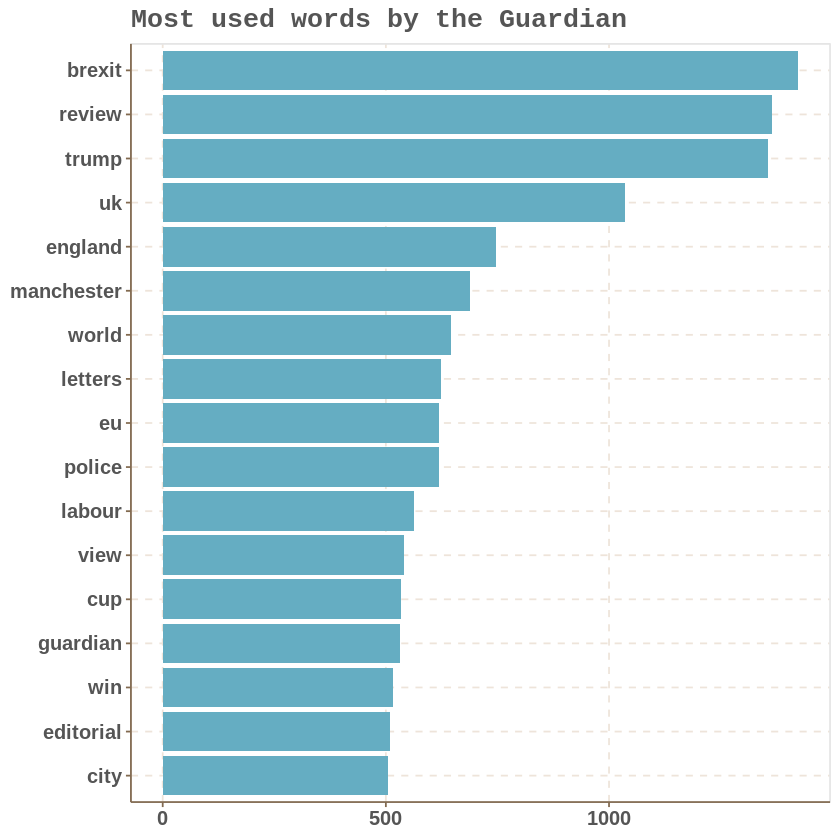

In [ ]:
guardian_titles_tidy %>% 
  count(word, sort = TRUE) %>%
  filter(n > 500) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word)) +
  geom_col()+
   theme(plot.title = element_text(size = 16, family  = "bell", face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold", size = 12),
    axis.text.y = element_text(face = "bold", size = 12),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    panel.border = element_rect(color = "grey90", fill = NA)
        )+
  labs(title = "Most used words by the Guardian")

In [ ]:
guardian_titles_count <- guardian_titles_tidy %>% 
  count(sectionName, word, sort = TRUE)

  head(guardian_titles_count)

,sectionName,word,n
,<chr>,<chr>,<int>
1,Music,review,1258
2,US news,trump,806
3,Politics,brexit,710
4,Football,manchester,529
5,Opinion,view,511
6,Opinion,editorial,502


In [ ]:
guardian_dtm <- guardian_titles_count %>% filter(word != "review") %>%
  cast_dtm(sectionName, word, n)

  guardian_dtm

<<DocumentTermMatrix (documents: 10, terms: 31073)>>
Non-/sparse entries: 69688/241042
Sparsity           : 78%
Maximal term length: 20
Weighting          : term frequency (tf)

Let's pretend that we know there are only 10 themes in our sample and train a LDA topic model.

In [ ]:
guardian_lda <- LDA(guardian_dtm, k = 10, control = list(seed = 1234))
guardian_lda

A LDA_VEM topic model with 10 topics.

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
guardian_lda_topics <- tidy(guardian_lda, matrix = "beta")
guardian_lda_topics

topic,term,beta
<int>,<chr>,<dbl>
1,trump,1.945800e-03
2,trump,4.347405e-03
3,trump,2.441630e-04
4,trump,1.776763e-03
5,trump,4.148865e-02
6,trump,1.041826e-03
7,trump,6.350306e-04
8,trump,1.787686e-03
9,trump,1.101876e-03


We could use dplyr’s slice_max() to find the top 5 terms within each topic.

In [ ]:
top_terms <- guardian_lda_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 5) %>%
  ungroup() %>%
  arrange(topic, - beta)

top_terms

topic,term,beta
<int>,<chr>,<dbl>
1,brexit,0.039494444
1,labour,0.021053540
1,eu,0.018143975
1,corbyn,0.014230517
1,letters,0.012228207
2,letters,0.005728696
2,uk,0.004757426
2,trump,0.004347405
2,police,0.004225750


In [ ]:
 ggthemr_reset()

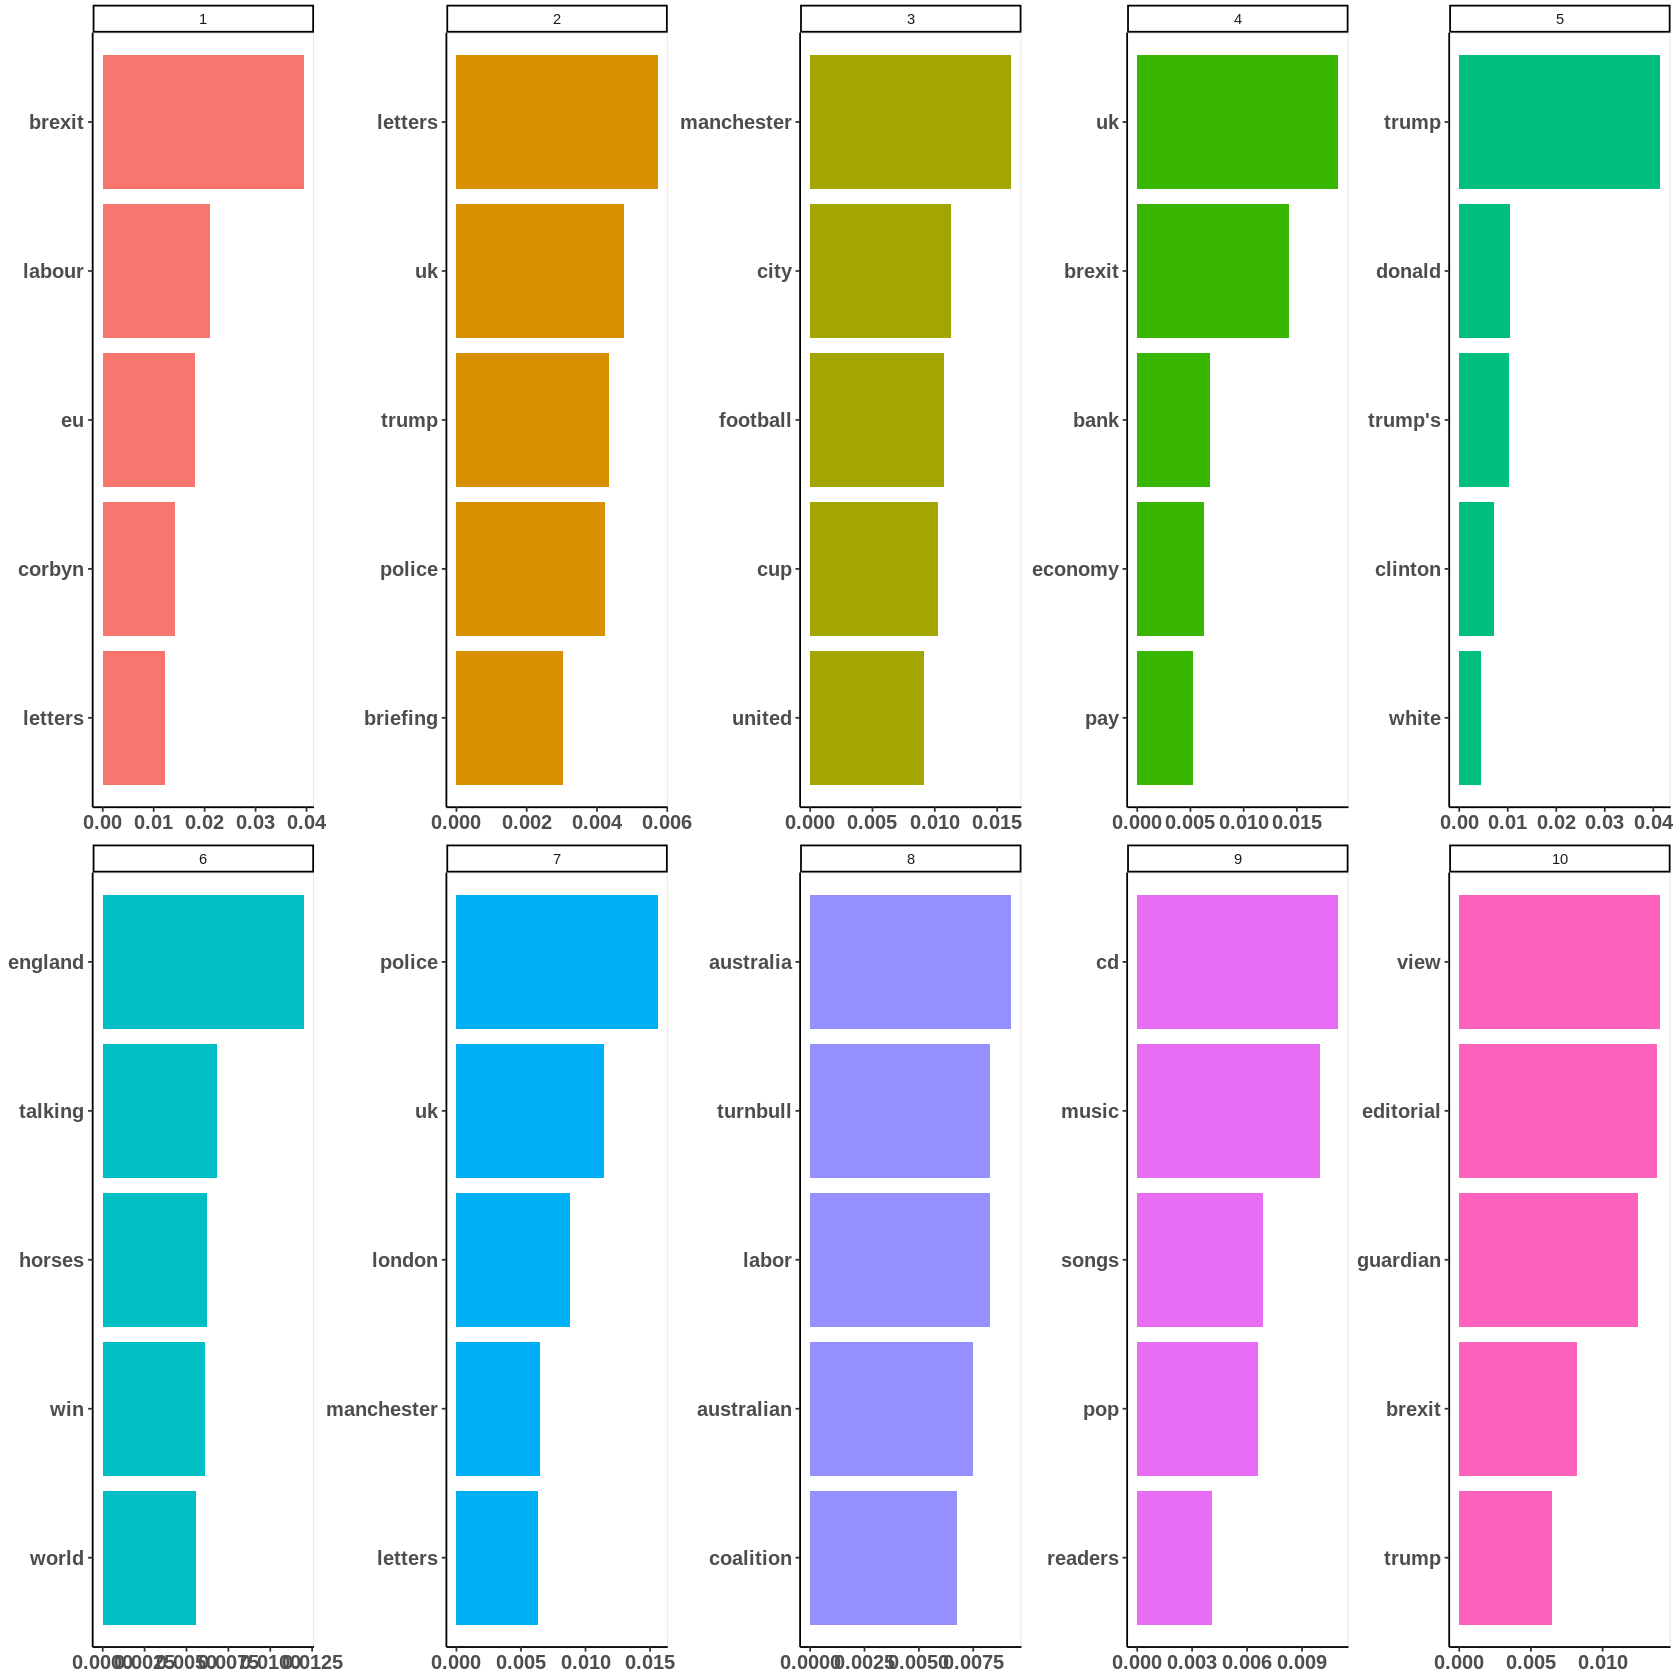

In [ ]:
#plot size control
options(repr.plot.width = 14, repr.plot.height =14)

top_terms_plot <- top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free", ncol = 5) +
  scale_y_reordered()+
  theme_classic()+
  theme(plot.margin = margin(.1,.2,.1,.2, "cm"),
    plot.title = element_text(size = 16, family  = "bell", face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold", size = 12),
    axis.text.y = element_text(face = "bold", size = 12),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    panel.border = element_rect(color = "grey90", fill = NA)
        )
top_terms_plot
#options(repr.P.width=8,repr.P.height=8)

## Per-document classification

 Can we put the articles back together in the correct topic groups? We can find this by examining the per-document-per-topic probabilities, 
γ
 (“gamma”).

In [ ]:
guardian_gamma <- tidy(guardian_lda, matrix = "gamma")
guardian_gamma

document,topic,gamma
<chr>,<int>,<dbl>
US news,1,6.342674e-07
Politics,1,9.999938e-01
Football,1,3.760703e-07
Opinion,1,4.478078e-03
Sport,1,3.775684e-07
Business,1,3.812338e-03
UK news,1,7.113442e-07
Music,1,6.788930e-07
World news,1,3.854944e-07


In [ ]:
popula

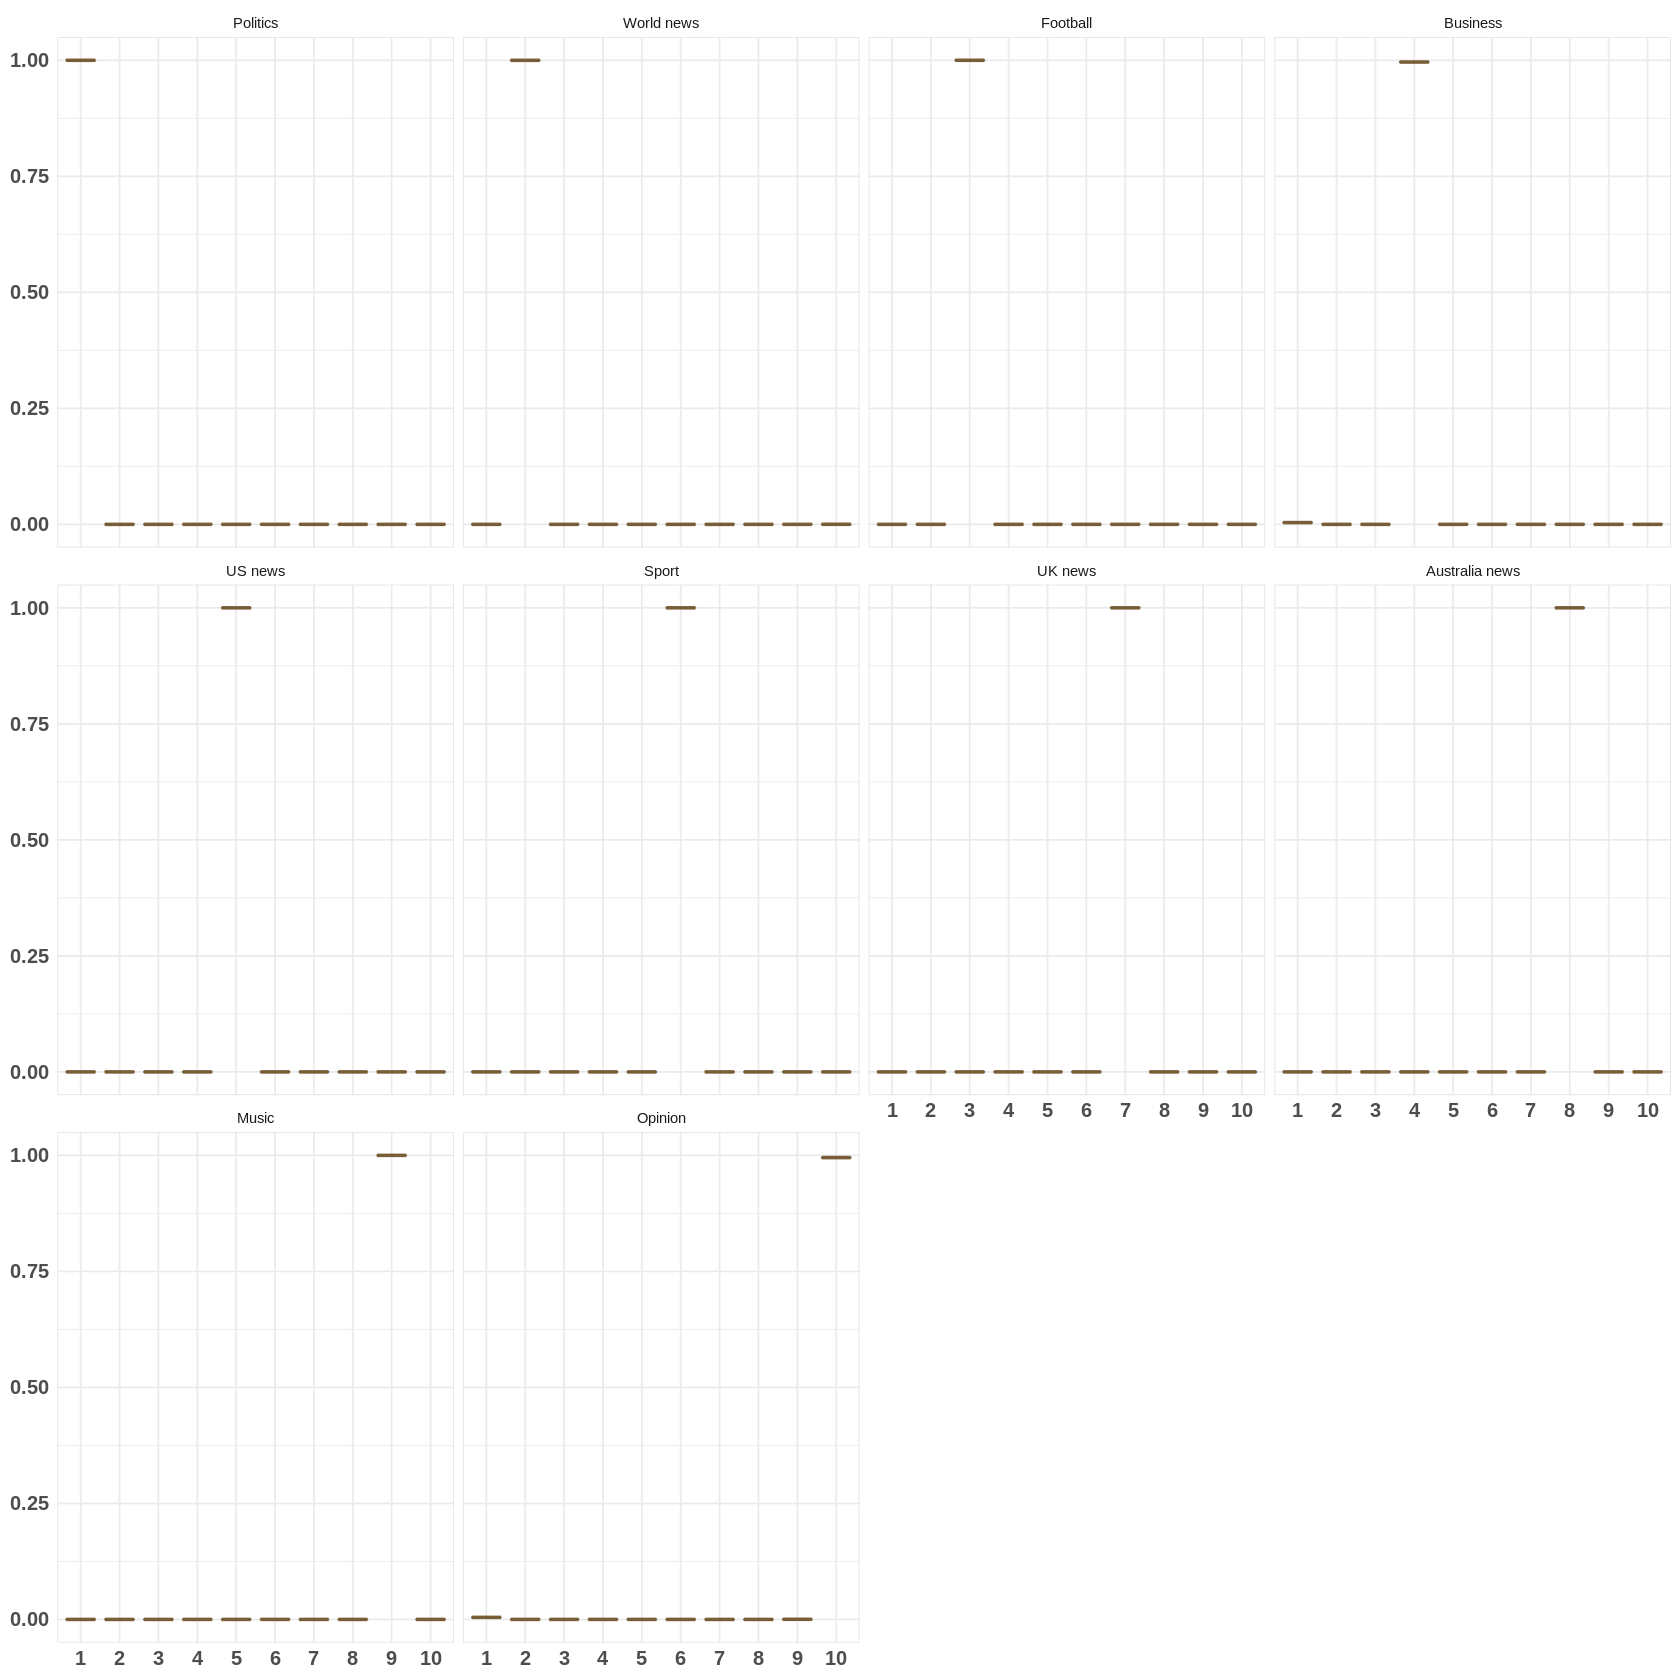

In [ ]:
guardian_gamma %>%
mutate(document = reorder(document, gamma*topic)) %>%
 ggplot(aes(factor(topic), gamma)) +
  geom_boxplot() +
  facet_wrap(~ document)+
  theme_minimal()+
   theme(
    plot.title = element_text(size = 16, family  = "bell", face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold", size = 12),
    axis.text.y = element_text(face = "bold", size = 12),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    panel.border = element_rect(color = "grey90", fill = NA)
        )